In [ ]:
import numpy as np
import pandas as pd

rng = np.random.default_rng(1)
x = rng.normal(size =100)
y = x - 2 * x**2 + rng.normal(size =100)

df = pd.DataFrame({
    "X": x,
    "Y": y
})

df

,X,Y
0,0.345584,-0.544554
1,0.821618,0.333950
2,0.330437,-0.013532
3,-1.303157,-4.030442
4,0.905356,0.484861
...,...,...
95,-2.250854,-14.001012
96,-0.138655,0.932532
97,0.033000,0.198928
98,-1.425349,-4.940183


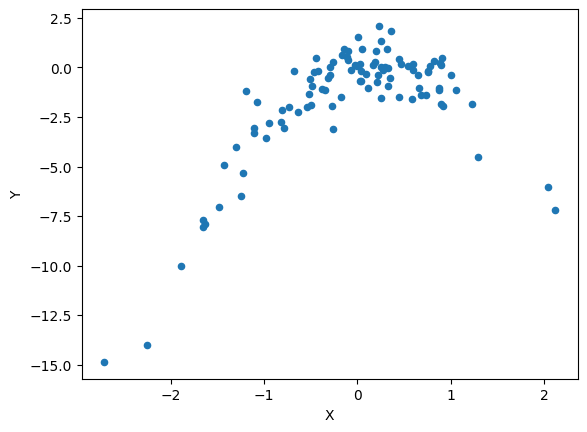

In [6]:
df.plot.scatter("X", "Y");

In [12]:
from ISLP.models import sklearn_sm
import statsmodels.api as sm
from sklearn.model_selection import cross_validate

M = sklearn_sm(sm.OLS)
cv_error = np.zeros(4)
for i, d in enumerate(range(1,5)):
    X = np.power.outer(x, np.arange(d+1))
    M_CV = cross_validate(M,
                          X,
                          y,
                          cv=x.shape[0])
    cv_error[i] = np.mean(M_CV['test_score'])
cv_error


array([7.56060369, 0.98403717, 0.96823558, 0.96595856])

In [13]:
rng = np.random.default_rng(2)
x = rng.normal(size =100)
y = x - 2 * x**2 + rng.normal(size =100)

M = sklearn_sm(sm.OLS)
cv_error = np.zeros(4)
for i, d in enumerate(range(1,5)):
    X = np.power.outer(x, np.arange(d+1))
    M_CV = cross_validate(M,
                          X,
                          y,
                          cv=x.shape[0])
    cv_error[i] = np.mean(M_CV['test_score'])
cv_error

array([7.56060369, 0.98403717, 0.96823558, 0.96595856])

The results obtained after changing the random seed in part (d) are numerically different in terms of the data values, since the new seed generates a different realization of the noise in the model. However, the relative pattern of LOOCV errors remains consistent: the second-degree polynomial model continues to outperform the others. This happens because the underlying true relationship between $X$ and $Y$ is quadratic, and although random noise changes with different seeds, the general shape of the data-generating function stays the same. As a result, even with different seeds, the model that best approximates the true function consistently shows the lowest cross-validation error.